In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import ecco_v4_py as ecco
from dask.distributed import Client
from glob import glob

import os
import warnings

In [2]:
warnings.simplefilter('ignore')
os.environ['PYTHONWARNOINGS'] = 'ignore'

picking up NetCDF formatted monthly data

In [3]:
dataDir = f'/scratch2/shared/ecco/v4r4'

In [4]:
%%time
ds = xr.open_mfdataset(glob(f'{dataDir}/nctiles_monthly/*/*/*.nc'))

CPU times: user 3min 46s, sys: 34.2 s, total: 4min 20s
Wall time: 6min 26s


In [5]:
ds

<xarray.Dataset>
Dimensions:    (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, nv: 2, tile: 13, time: 312)
Coordinates:
  * i_g        (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * j          (j) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * tile       (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    Z          (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    timestep   (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time       (time) datetime64[ns] 1992-01-16T12:00:00 ... 2017-12-16
    time_bnds  (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
  * j_g        (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i          (i) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
    XC         (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YC         (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
Dimensions without coordinates: nv
Data variables:
    ADVx_TH    (time, k, tile, j, i_g) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_TH    (time, k, tile, j_g, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    DFxE_TH    (time, k, tile, j, i_g) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    DFyE_TH    (time, k, tile, j_g, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    SALT       (time, k, tile, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    THETA      (time, k, tile, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    UVELMASS   (time, k, tile, j, i_g) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    VVELMASS   (time, k, tile, j_g, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
Attributes:
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 3 Extension (ECCOv4r...
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    Project:                      Estimating the Circulation and Climate of t...
    cdm_data_type:                Grid
    geospatial_lon_units:         degrees_east
    Metadata_Conventions:         CF-1.6, Unidata Dataset Discovery v1.0, GDS...
    no_data:                      NaNf
    geospatial_lat_units:         degrees_north
    product_time_coverage_end:    2017-12-31T12:00:00
    geospatial_vertical_min:      -5906.25
    nz:                           50
    geospatial_vertical_units:    meter
    geospatial_vertical_max:      -5.0
    date_created:                 Fri Aug 16 12:27:32 2019
    time_coverage_start:          1992-01-01T00:00:00
    time_coverage_end:            1992-02-01T00:00:00

Load GRID file

In [6]:
dgrid = xr.open_dataset(f'{dataDir}/nctiles_grid/ECCO-GRID.nc')
dgrid

<xarray.Dataset>
Dimensions:  (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_l: 50, k_p1: 51, k_u: 50, tile: 13)
Coordinates:
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_u      (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * tile     (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC       (tile, j, i) float32 ...
    YC       (tile, j, i) float32 ...
    XG       (tile, j_g, i_g) float32 ...
    YG       (tile, j_g, i_g) float32 ...
    CS       (tile, j, i) float32 ...
    SN       (tile, j, i) float32 ...
    Zl       (k_l) float32 ...
    Zu       (k_u) float32 ...
    Z        (k) float32 ...
    Zp1      (k_p1) float32 ...
    dxC      (tile, j, i_g) float32 ...
    rAs      (tile, j_g, i) float32 ...
    rAw      (tile, j, i_g) float32 ...
    Depth    (tile, j, i) float32 ...
    rA       (tile, j, i) float32 ...
    dxG      (tile, j_g, i) float32 ...
    dyG      (tile, j, i_g) float32 ...
    rAz      (tile, j_g, i_g) float32 ...
    dyC      (tile, j_g, i) float32 ...
    PHrefC   (k) float32 ...
    drC      (k_p1) float32 ...
    PHrefF   (k_p1) float32 ...
    drF      (k) float32 ...
    hFacS    (k, tile, j_g, i) float32 ...
    hFacC    (k, tile, j, i) float32 ...
    hFacW    (k, tile, j, i_g) float32 ...
    maskW    (k, tile, j, i_g) bool ...
    maskC    (k, tile, j, i) bool ...
    maskS    (k, tile, j_g, i) bool ...
Data variables:
    *empty*
Attributes:
    date_created:  Mon Dec 30 11:13:26 2019
    title:         ECCOv4 MITgcm grid information

In [7]:
dgrid.load()
ds = ds.merge(dgrid)
ds

,Array,Chunk
Bytes,2.50 kB,8 B
Shape,"(312,)","(1,)"
Count,10610 Tasks,312 Chunks
Type,int64,numpy.ndarray
,Array,Chunk
Bytes,4.99 kB,16 B
Shape,"(312, 2)","(1, 2)"
Count,13730 Tasks,312 Chunks
Type,datetime64[ns],numpy.ndarray
,Array,Chunk


Checking I loaded correctly by plotting surface tempertaure, SST. LLC grid proving to be a headache...

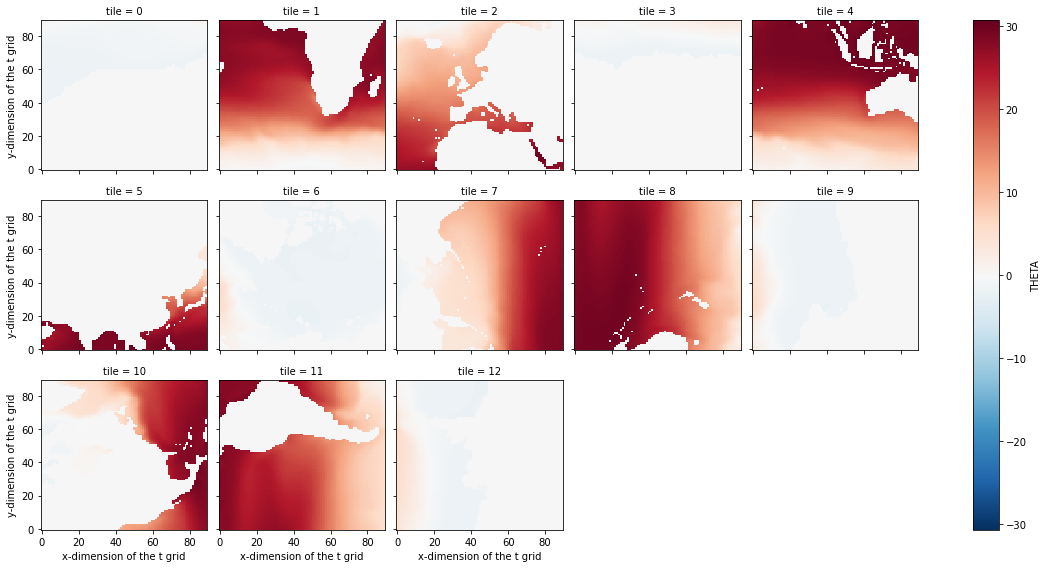

In [8]:
sst = ds.THETA.isel(k=0).mean('time')
sst.plot(col='tile',col_wrap=5,figsize=(16,8))

## Show rotated indices

Tile 2 is *NOT* rotated, Tile 10 *IS* rotated. This means that the index **i** corresponds to change in *longitude* in Tile 2 and change in *latitude* in Tile 10. 

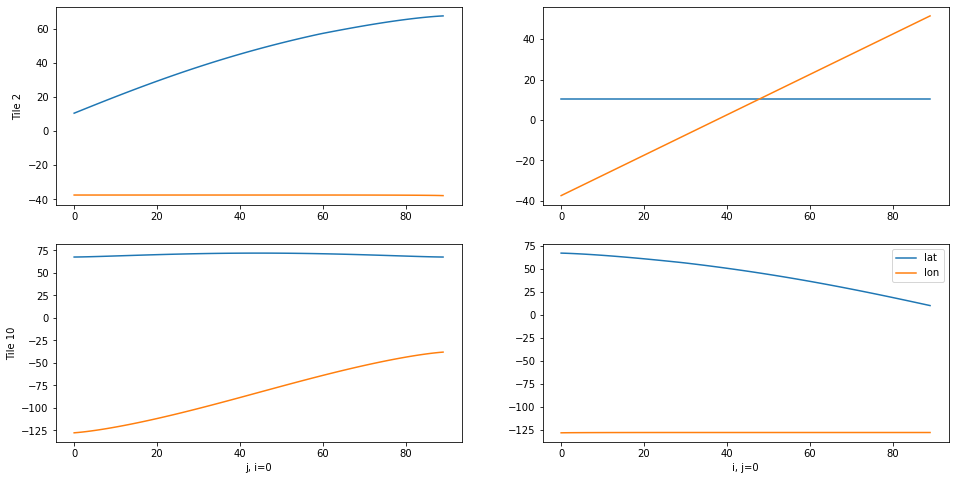

In [9]:
plt.figure(figsize=(16,8))
plt.subplot(221)
plt.plot( ds.YC.sel(tile=2, i=0), label='lat')
plt.plot( ds.XC.sel(tile=2, i=0), label='lon' )
plt.ylabel('Tile 2')

plt.subplot(223)
plt.plot( ds.YC.sel(tile=10, i=0), label='lat')
plt.plot( ds.XC.sel(tile=10, i=0), label='lon' )
plt.xlabel('j, i=0')
plt.ylabel('Tile 10')

plt.subplot(222)
plt.plot( ds.YC.sel(tile=2, j=0), label='lat')
plt.plot( ds.XC.sel(tile=2, j=0), label='lon' )

plt.subplot(224)
plt.plot( ds.YC.sel(tile=10, j=0), label='lat')
plt.plot( ds.XC.sel(tile=10, j=0), label='lon' )

plt.xlabel('i, j=0')
plt.legend()
plt.show()

## Some standard looking plots

Plot on lat lon projection, easy thanks to ECCO-v4_py. Robinson and Orthographic projections. 

-179.875 179.875
-180.0 180.0
-89.875 89.875
-90.0 90.0


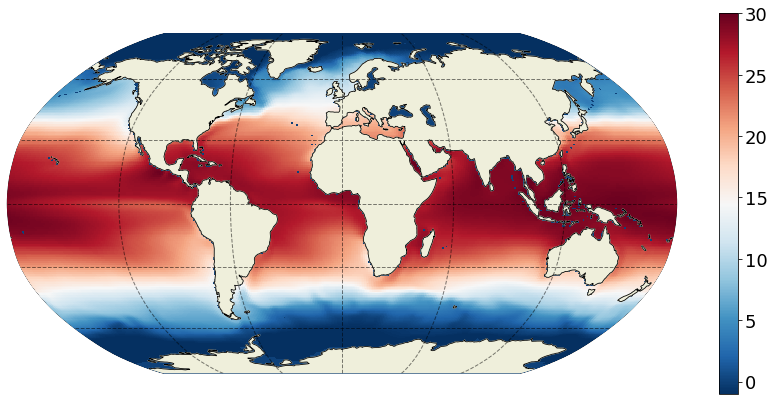

In [10]:
plt.rcParams.update({'figure.figsize':(15,7),'font.size':18})

ecco.plot_proj_to_latlon_grid(ds.XC,ds.YC,sst,
                              show_colorbar=True,
                              cmin=-1, cmax=30 );
#plt.savefig('../img/eccov4r4-SST.png')

-179.875 139.875
-180.0 140.0
-89.875 89.875
-90.0 90.0
140.1257961320755 179.87421386792454
140.00001 180.0
-89.875 89.875
-90.0 90.0


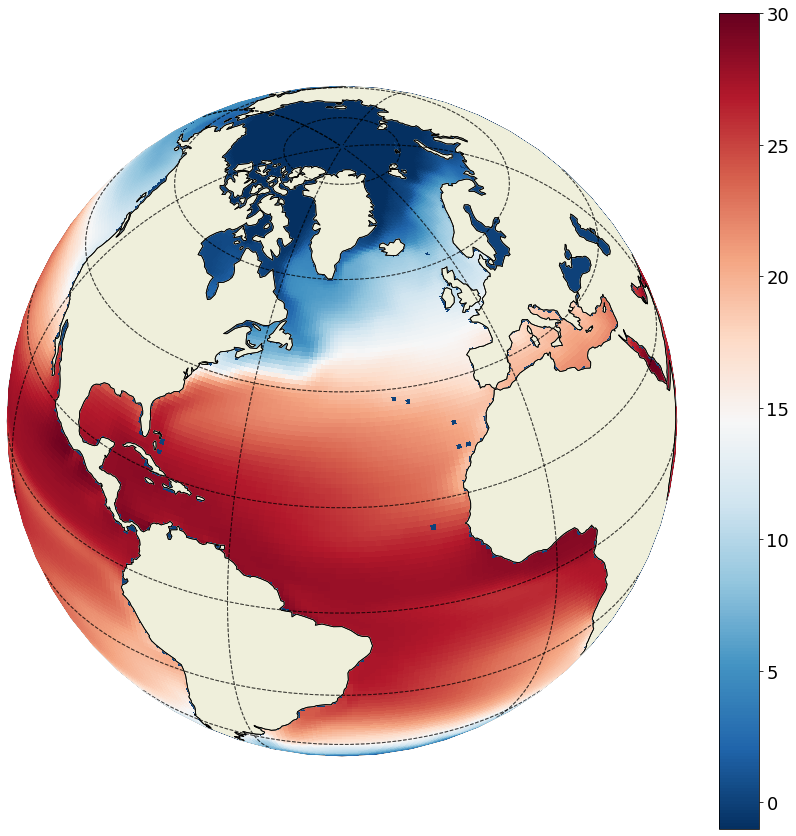

In [11]:
plt.rcParams.update({'figure.figsize':(15,15),'font.size':18})
ecco.plot_proj_to_latlon_grid(ds.XC,ds.YC,sst,
                              show_colorbar=True,#cmap='YlOrRd',
                              projection_type='ortho',
                              cmin=-1,cmax=30,
                              user_lon_0=-40,
                              user_lat_0=35 );
#plt.savefig('../img/eccov4r4-SST-ortho.png')

Now try to plot over a subset

In [12]:
# Get array of 1's at range of latitude and longitudes
latTop = 67.922
latBottom = 65.3033
lonLeft = -31.859
lonRight = -20.183
ones = xr.ones_like(ds.YC)
dome_maskC = ones.where( (ds.YC>=latBottom) &  (ds.YC<=latTop) & (ds.XC>=lonLeft) & (ds.XC<=lonRight), 0)

-179.875 154.875
-180.0 155.0
-89.875 89.875
-90.0 90.0
155.12627257575758 179.87373742424242
155.00001 180.0
-89.875 89.875
-90.0 90.0


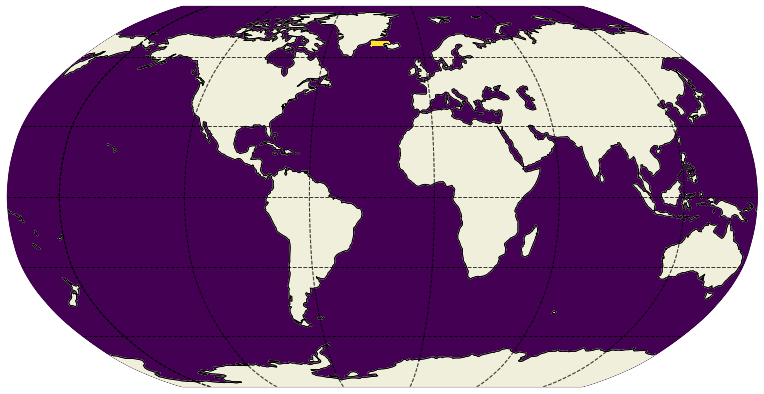

In [13]:
plt.figure(figsize=(15,7))
ecco.plot_proj_to_latlon_grid(ds.XC,ds.YC,dome_maskC,
                              user_lon_0=-25);

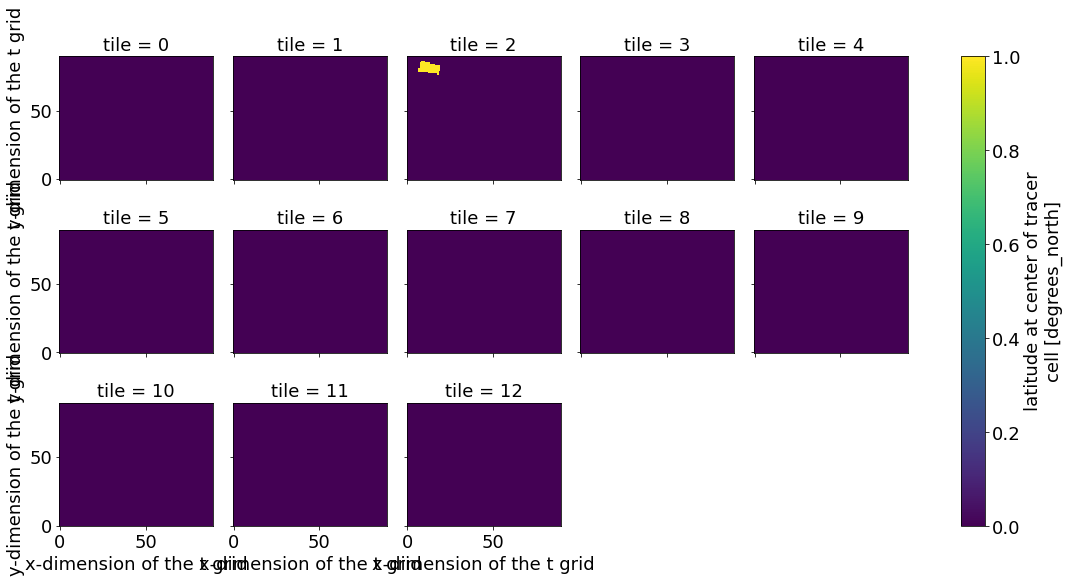

In [14]:
dome_maskC.plot(col='tile',col_wrap=5,figsize=(16,8));

-179.875 179.875
-180.0 180.0
-89.875 89.875
-90.0 90.0


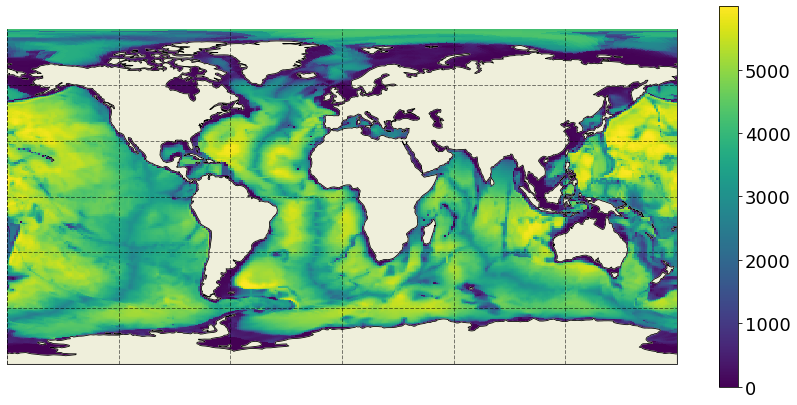

In [15]:
plt.figure(figsize=(15,7))
ecco.plot_proj_to_latlon_grid(ds.XC,ds.YC,ds.Depth,
                              projection_type='PlateCarree',
                              user_lon_0=0,
                              show_colorbar=True);

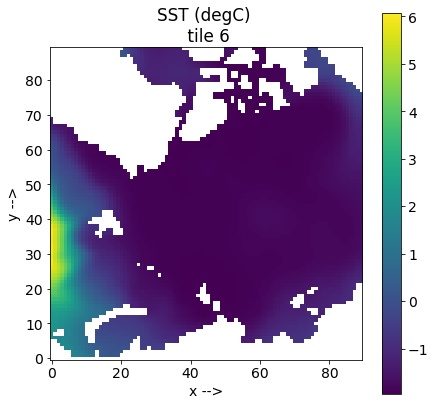

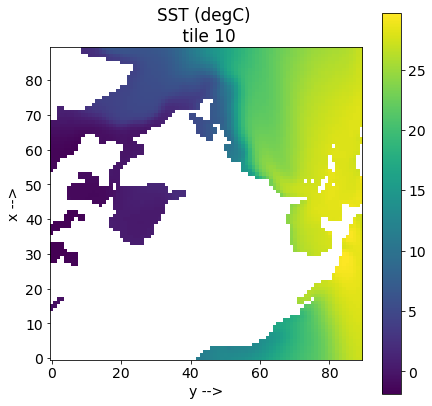

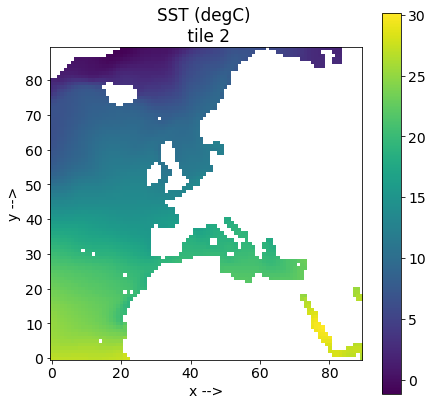

In [16]:
plt.rcParams.update({'figure.figsize':(7,7),'font.size':14})

# Step 1, select the tile to plot using the **.isel( )** syntax.
tile_to_plot= sst.isel(tile=6).where(ds.hFacC.isel(tile=6,k=0) !=0, np.nan)

# Step 2, use plt.imshow()
plt.imshow(tile_to_plot, origin='lower');

# Step 3, add colorbar, title, and x and y axis labels
plt.colorbar()
plt.title('SST (degC) \n tile 6')
plt.xlabel('x -->')
plt.ylabel('y -->')
plt.show()




# Step 1, select the tile to plot using the **.isel( )** syntax.
tile_to_plot= sst.isel(tile=10).where(ds.hFacC.isel(tile=10,k=0) !=0, np.nan)

# Step 2, use plt.imshow()
plt.imshow(tile_to_plot, origin='lower');

# Step 3, add colorbar, title, and x and y axis labels
plt.colorbar()
plt.title('SST (degC) \n tile 10')
plt.xlabel('y -->')
plt.ylabel('x -->')
plt.show()




# Step 1, select the tile to plot using the **.isel( )** syntax.
tile_to_plot= sst.isel(tile=2).where(ds.hFacC.isel(tile=2,k=0) !=0, np.nan)

# Step 2, use plt.imshow()
plt.imshow(tile_to_plot, origin='lower');

# Step 3, add colorbar, title, and x and y axis labels
plt.colorbar()
plt.title('SST (degC) \n tile 2')
plt.xlabel('x -->')
plt.ylabel('y -->')
plt.show()

In [17]:
def find_nearest(array,value):
    idx,val = min(enumerate(array), key=lambda x: abs(x[1]-value))
    return idx

In [18]:
#find_nearest(ds.XC, -31.859)

In [19]:
subset = ds.THETA.where( (ds.YC<67) & (ds.YC>66) & (ds.XC>-32) & (ds.XC<-31))
subset

,Array,Chunk
Bytes,6.57 GB,21.06 MB
Shape,"(312, 50, 13, 90, 90)","(1, 50, 13, 90, 90)"
Count,1249 Tasks,312 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,2.50 kB,8 B
Shape,"(312,)","(1,)"
Count,10610 Tasks,312 Chunks
Type,int64,numpy.ndarray


-179.875 179.875
-180.0 180.0
-89.875 89.875
-90.0 90.0


ValueError: Mismatch between geometry and dataset

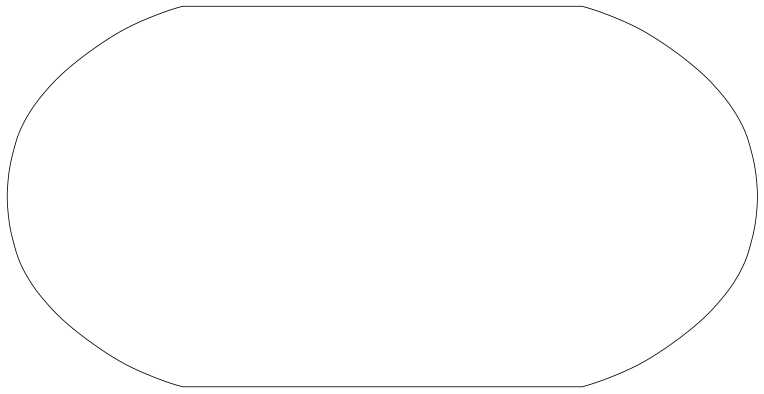

In [21]:
plt.figure(figsize=(15,7))
ecco.plot_proj_to_latlon_grid(subset.XC,subset.YC,subset,
                              user_lon_0=0,
                              show_colorbar=True);